In [1]:
%matplotlib inline


# Using Wyscout 

Getting familiar with Wyscout data


In [2]:
#importing necessary libraries
import pathlib
import os
import pandas as pd
import json

## Competition data
In this dataframe you will find information about the id of a competition and available competitions.
If you are trying it locally, comment  ..... active lines (put # in front lines path = ...) and comment out (delete #).



In [3]:
path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', 'competitions.json')
with open(path) as f:
    data = json.load(f)
df_competitions = pd.DataFrame(data)
df_competitions['Country'] = df_competitions['area'].apply(lambda x: x['name'] if 'name' in x else None)
df_competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     7 non-null      object
 1   wyId     7 non-null      int64 
 2   format   7 non-null      object
 3   area     7 non-null      object
 4   type     7 non-null      object
 5   Country  7 non-null      object
dtypes: int64(1), object(5)
memory usage: 464.0+ bytes


## Match data
In this dataframe you can find information about all games that were played in Premier League 2017/18 season.
*wyId* is the unique id in the Wyscout database. 



In [4]:
# 计算每个联赛数据的行数
def count_data_rows(league_name):
    path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', f'matches_{league_name}.json')
    with open(path) as f:
        data = json.load(f)
    df_league = pd.DataFrame(data)
    data_count = df_league.shape[0]
    return data_count

# 计算英超联赛数据的行数
england_data_count = count_data_rows('England')
print(f'England Data Count: {england_data_count}')

# 计算其他四个联赛数据的行数（假设它们分别为 "Spain", "Italy", "Germany", "France"）
spain_data_count = count_data_rows('Spain')
italy_data_count = count_data_rows('Italy')
germany_data_count = count_data_rows('Germany')
france_data_count = count_data_rows('France')

# 打印每个联赛数据的行数
print(f'Spain Data Count: {spain_data_count}')
print(f'Italy Data Count: {italy_data_count}')
print(f'Germany Data Count: {germany_data_count}')
print(f'France Data Count: {france_data_count}')


England Data Count: 380
Spain Data Count: 380
Italy Data Count: 380
Germany Data Count: 306
France Data Count: 380


In [6]:
def load_and_merge_league_data(league_name, df_matches):
    path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', f'matches_{league_name}.json')
    with open(path) as f:
        data = json.load(f)
    df_league = pd.DataFrame(data)
    df_matches = pd.concat([df_matches, df_league], ignore_index=True)
    return df_matches
df_matches = pd.DataFrame()
df_matches = load_and_merge_league_data('England', df_matches)
df_matches = load_and_merge_league_data('Spain', df_matches)
df_matches = load_and_merge_league_data('Italy', df_matches)
df_matches = load_and_merge_league_data('Germany', df_matches)
df_matches = load_and_merge_league_data('France', df_matches)
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status         1826 non-null   object
 1   roundId        1826 non-null   int64 
 2   gameweek       1826 non-null   int64 
 3   teamsData      1826 non-null   object
 4   seasonId       1826 non-null   int64 
 5   dateutc        1826 non-null   object
 6   winner         1826 non-null   int64 
 7   venue          1826 non-null   object
 8   wyId           1826 non-null   int64 
 9   label          1826 non-null   object
 10  date           1826 non-null   object
 11  referees       1826 non-null   object
 12  duration       1826 non-null   object
 13  competitionId  1826 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 199.8+ KB


In [7]:
df_matches = df_matches.drop_duplicates(subset=['wyId'])
print(df_matches)


      status  roundId  gameweek  \
0     Played  4405654        38   
1     Played  4405654        38   
2     Played  4405654        38   
3     Played  4405654        38   
4     Played  4405654        38   
...      ...      ...       ...   
1821  Played  4405655         1   
1822  Played  4405655         1   
1823  Played  4405655         1   
1824  Played  4405655         1   
1825  Played  4405655         1   

                                              teamsData  seasonId  \
0     {'1646': {'scoreET': 0, 'coachId': 8880, 'side...    181150   
1     {'1628': {'scoreET': 0, 'coachId': 8357, 'side...    181150   
2     {'1609': {'scoreET': 0, 'coachId': 7845, 'side...    181150   
3     {'1651': {'scoreET': 0, 'coachId': 8093, 'side...    181150   
4     {'1644': {'scoreET': 0, 'coachId': 93112, 'sid...    181150   
...                                                 ...       ...   
1821  {'3783': {'scoreET': 0, 'coachId': 210513, 'si...    181189   
1822  {'3782': {'scoreET': 

In [8]:
df_matches1 = df_matches.copy()
def extract_team_ids(teams_data, side):
    for team_data in teams_data.values():
        if team_data['side'] == side:
            return team_data['teamId']
    return None
df_matches1['home_team_ids'] = df_matches1['teamsData'].apply(lambda x: extract_team_ids(x, 'home'))
df_matches1['away_team_ids'] = df_matches1['teamsData'].apply(lambda x: extract_team_ids(x, 'away'))
print(df_matches1[['home_team_ids', 'away_team_ids']])


      home_team_ids  away_team_ids
0              1646           1659
1              1628           1627
2              1673           1609
3              1612           1651
4              1611           1644
...             ...            ...
1821           3787           3783
1822           3782           3775
1823           3795           3774
1824           3767           3789
1825          19830           3780

[1826 rows x 2 columns]


In [13]:
print(df_matches['teamsData'][0])



{'1646': {'scoreET': 0, 'coachId': 8880, 'side': 'home', 'teamId': 1646, 'score': 1, 'scoreP': 0, 'hasFormation': 1, 'formation': {'bench': [{'playerId': 77502, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 270828, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 9164, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 8516, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 9179, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 532949, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 9127, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}], 'lineup': [{'playerId': 9206, 'ownGoals': '0', 'redCards': '0', 'goals': '1', 'yellowCards': '0'}, {'playerId': 93, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 10108, 'ownGoal

## Player data
In this dataframe you can find information about all players available for Wyscout public dataset. *wyId* is 
the player id in the Wyscout database. In the *currentTeamId* you can find the id of a team that the player plays form.
*shortName* is an important column for vizualisations and rankings since player's name is written in a shorter way.



In [9]:

path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', 'players.json')
with open(path) as f:
    data = json.load(f)
df_players = pd.DataFrame(data)
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   passportArea           3603 non-null   object
 1   weight                 3603 non-null   int64 
 2   firstName              3603 non-null   object
 3   middleName             3603 non-null   object
 4   lastName               3603 non-null   object
 5   currentTeamId          3512 non-null   object
 6   birthDate              3603 non-null   object
 7   height                 3603 non-null   int64 
 8   role                   3603 non-null   object
 9   birthArea              3603 non-null   object
 10  wyId                   3603 non-null   int64 
 11  foot                   3603 non-null   object
 12  shortName              3603 non-null   object
 13  currentNationalTeamId  3603 non-null   object
dtypes: int64(3), object(11)
memory usage: 394.2+ KB


In [10]:
from datetime import datetime
def calculate_age(birth_date):
    reference_date = datetime(2017, 8, 1)
    birth_date = datetime.strptime(birth_date, '%Y-%m-%d')
    age = reference_date.year - birth_date.year - ((reference_date.month, reference_date.day) < (birth_date.month, birth_date.day))
    return age
df_players1 = df_players.copy()
df_players1['age'] = df_players1['birthDate'].apply(calculate_age)
print(df_players1[['age']])


      age
0      28
1      18
2      18
3      27
4      18
...   ...
3598   27
3599   25
3600   22
3601   21
3602   20

[3603 rows x 1 columns]


In [11]:
df_players1['role'] = df_players1['role'].apply(lambda role_info: role_info['name'])
print(df_players1[['role']])
print(df_players1.info)

            role
0     Goalkeeper
1       Defender
2     Goalkeeper
3     Midfielder
4       Defender
...          ...
3598    Defender
3599  Goalkeeper
3600    Defender
3601  Goalkeeper
3602  Midfielder

[3603 rows x 1 columns]
<bound method DataFrame.info of                                            passportArea  weight  \
0     {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1     {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2     {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3     {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4     {'name': 'France', 'id': '250', 'alpha3code': ...      84   
...                                                 ...     ...   
3598  {'name': 'Tunisia', 'id': 788, 'alpha3code': '...      72   
3599  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...      76   
3600  {'name': 'Peru', 'id': 604, 'alpha3code': 'PER...      78   
3601  {'name': 'Morocco', 'id': 504, 'alpha3code': '...      70   
36

## Event data
In this dataframe you can find information about all events that occured in all the games during 2017/18 Premier League
season. *matchId* matches the wyId from *df_matches*, *playerId* matches *wyId* from *df_players*.*tags* provide information on additional characteristics of an event, for example
if the pass was accurate. The location on the pass can be found in *positions*, but remeber, that the data are collected
on 100x100 square with reverted y-axis. In the *eventName* you will find the basic name of an event, whereas *subEventName*
provide more information. *eventSec* is the time of an event.

If you want to learn more about Wyscout data, you can explore 
[WyScout API](https://apidocs.wyscout.com/), but remember to switch the version to 2.0 at the top of the page.

This code is adjusted to the webpage with file size limit. If you want to open the data that is stored in the working
directory, comment (put '#') before the following code and comment out the lines below them (delete '#').



In [12]:
def load_and_merge_event_data(league_name, df_events):
    path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', f'events_{league_name}.json')
    with open(path) as f:
        data = json.load(f)
    df_event_league = pd.DataFrame(data)
    df_events = pd.concat([df_events, df_event_league], ignore_index=True)
    return df_events
df_events = pd.DataFrame()
df_events = load_and_merge_event_data('England', df_events)
df_events = load_and_merge_event_data('Spain', df_events)
df_events = load_and_merge_event_data('Italy', df_events)
df_events = load_and_merge_event_data('Germany', df_events)
df_events = load_and_merge_event_data('France', df_events)
df_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071395 entries, 0 to 3071394
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   eventId       int64  
 1   subEventName  object 
 2   tags          object 
 3   playerId      int64  
 4   positions     object 
 5   matchId       int64  
 6   eventName     object 
 7   teamId        int64  
 8   matchPeriod   object 
 9   eventSec      float64
 10  subEventId    object 
 11  id            int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 281.2+ MB


In [18]:
print(df_events)

         eventId  subEventName  \
0              8   Simple pass   
1              8     High pass   
2              8     Head pass   
3              8     Head pass   
4              8   Simple pass   
...          ...           ...   
3071390       10          Shot   
3071391        9  Save attempt   
3071392        8   Simple pass   
3071393        8   Simple pass   
3071394        8   Simple pass   

                                                      tags  playerId  \
0                                           [{'id': 1801}]     25413   
1                                           [{'id': 1801}]    370224   
2                                           [{'id': 1801}]      3319   
3                                           [{'id': 1801}]    120339   
4                                           [{'id': 1801}]    167145   
...                                                    ...       ...   
3071390  [{'id': 101}, {'id': 401}, {'id': 201}, {'id':...    405977   
3071391        

## Before you start
Run these lines in Spyder/Jupyter notebook and explore dataframes 
to get more familiar before you start working on the course.


## Player rank

In [16]:
#path to data
path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', 'playerank.json')
#open data
with open(path) as f:
    data = json.load(f)
#save it in a dataframe  
df_playerank = pd.DataFrame(data)
#structure of data
df_playerank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46897 entries, 0 to 46896
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   goalScored      46897 non-null  int64  
 1   playerankScore  46897 non-null  float64
 2   matchId         46897 non-null  int64  
 3   playerId        46897 non-null  int64  
 4   roleCluster     46897 non-null  object 
 5   minutesPlayed   46897 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.1+ MB


## Teams

In [13]:
path = os.path.join(str(pathlib.Path().resolve()), 'data', 'Wyscout', 'teams.json')
with open(path) as f:
    data = json.load(f)
df_teams = pd.DataFrame(data)
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          142 non-null    object
 1   name          142 non-null    object
 2   wyId          142 non-null    int64 
 3   officialName  142 non-null    object
 4   area          142 non-null    object
 5   type          142 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.8+ KB


In [14]:
missing_values = df_events.isnull().sum()
print("Missing values count for each column:")
print(missing_values)


Missing values count for each column:
eventId         0
subEventName    0
tags            0
playerId        0
positions       0
matchId         0
eventName       0
teamId          0
matchPeriod     0
eventSec        0
subEventId      0
id              0
dtype: int64


In [17]:
missing_values_playerank = df_playerank.isnull().sum()
print("Missing values count for df_playerank:")
print(missing_values_playerank)
missing_values_matches = df_matches.isnull().sum()
print("Missing values count for df_matches:")
print(missing_values_matches)
missing_values_competitions = df_competitions.isnull().sum()
print("Missing values count for df_competitions:")
print(missing_values_competitions)
missing_values_players = df_players.isnull().sum()
print("Missing values count for df_players:")
print(missing_values_players)


Missing values count for df_playerank:
goalScored        0
playerankScore    0
matchId           0
playerId          0
roleCluster       0
minutesPlayed     0
dtype: int64
Missing values count for df_matches:
status           0
roundId          0
gameweek         0
teamsData        0
seasonId         0
dateutc          0
winner           0
venue            0
wyId             0
label            0
date             0
referees         0
duration         0
competitionId    0
dtype: int64
Missing values count for df_competitions:
name       0
wyId       0
format     0
area       0
type       0
Country    0
dtype: int64
Missing values count for df_players:
passportArea              0
weight                    0
firstName                 0
middleName                0
lastName                  0
currentTeamId            91
birthDate                 0
height                    0
role                      0
birthArea                 0
wyId                      0
foot                      0
shortN

In [18]:
df_players_cleaned = df_players.dropna(subset=['currentTeamId'])
print("DataFrame after dropping rows with missing currentTeamId:")
df_players_cleaned.info()


DataFrame after dropping rows with missing currentTeamId:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3512 entries, 0 to 3602
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   passportArea           3512 non-null   object
 1   weight                 3512 non-null   int64 
 2   firstName              3512 non-null   object
 3   middleName             3512 non-null   object
 4   lastName               3512 non-null   object
 5   currentTeamId          3512 non-null   object
 6   birthDate              3512 non-null   object
 7   height                 3512 non-null   int64 
 8   role                   3512 non-null   object
 9   birthArea              3512 non-null   object
 10  wyId                   3512 non-null   int64 
 11  foot                   3512 non-null   object
 12  shortName              3512 non-null   object
 13  currentNationalTeamId  3512 non-null   object
dtypes: int64(3), o

In [19]:
df_shots = df_events[df_events['eventName'] == 'Shot'
print("Rows with eventName equal to 'Shot':")
print(df_shots)

Rows with eventName equal to 'Shot':
         eventId subEventName  \
46            10         Shot   
62            10         Shot   
91            10         Shot   
128           10         Shot   
249           10         Shot   
...          ...          ...   
3071282       10         Shot   
3071293       10         Shot   
3071309       10         Shot   
3071311       10         Shot   
3071390       10         Shot   

                                                      tags  playerId  \
46       [{'id': 101}, {'id': 402}, {'id': 201}, {'id':...     25413   
62       [{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...     26150   
91       [{'id': 101}, {'id': 403}, {'id': 201}, {'id':...     14763   
128      [{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...      7868   
249      [{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...      7868   
...                                                    ...       ...   
3071282  [{'id': 401}, {'id': 201}, {'id': 1205}, {'id'...    

In [20]:
df_shots1 = df_shots.copy()
df_shots1['start_position'] = df_shots1['positions'].apply(lambda pos: f"{pos[0]['y']},{pos[0]['x']}")
df_shots1['end_position'] = df_shots1['positions'].apply(lambda pos: f"{pos[1]['y']},{pos[1]['x']}")
df_shots1['tags'] = df_shots1['tags'].apply(lambda tags: ','.join(str(tag['id']) for tag in tags))
print(df_shots1[['start_position', 'end_position']])


        start_position end_position
46               41,88          0,0
62               52,85      100,100
91               52,96      100,100
128              33,81          0,0
249              30,75          0,0
...                ...          ...
3071282          26,87          0,0
3071293          50,89          0,0
3071309          59,91      100,100
3071311          50,95      100,100
3071390          65,87      100,100

[40461 rows x 2 columns]


In [21]:
df_shots1[['start_y', 'start_x']] = df_shots1['start_position'].str.split(',', expand=True)
print(df_shots1[['start_x', 'start_y']])

        start_x start_y
46           88      41
62           85      52
91           96      52
128          81      33
249          75      30
...         ...     ...
3071282      87      26
3071293      89      50
3071309      91      59
3071311      95      50
3071390      87      65

[40461 rows x 2 columns]


In [24]:
import math
def calculate_distance(x, y):
    field_width = 105
    field_height = 68
    goal_center_x = 100
    goal_center_y = 50
    x_percentage = float(x)
    y_percentage = float(y)
    
    x_distance_percentage = abs(x_percentage - goal_center_x)
    y_distance_percentage = abs(y_percentage - goal_center_y)
    
    x_distance_meter = (x_distance_percentage / 100) * field_width
    y_distance_meter = (y_distance_percentage / 100) * field_height
    
    distance_meter = math.sqrt(x_distance_meter**2 + y_distance_meter**2)
    return distance_meter

df_shots1['distance'] = df_shots1.apply(lambda row: calculate_distance(row['start_x'], row['start_y']), axis=1)

# Display the modified DataFrame df_shots1
print(df_shots1['distance'])

46         14.007655
62         15.808608
91          4.414703
128        23.057235
249        29.563872
             ...    
3071282    21.275923
3071293    11.550000
3071309    11.258637
3071311     5.250000
3071390    17.040026
Name: distance, Length: 40461, dtype: float64


In [25]:

# Calculate the y-coordinate of the left goalpost
left_goalpost_y = 50 - (7.32 / 2) / 68 * 100

# Calculate the y-coordinate of the right goalpost
right_goalpost_y = 50 + (7.32 / 2) / 68 * 100

# Calculate the angle between player's position (C) and goalposts (A, B)
def calculate_angle(x_player, y_player, x_goalpost_a, y_goalpost_a, x_goalpost_b, y_goalpost_b):
    vector_ca = [x_goalpost_a - x_player, y_goalpost_a - y_player]
    vector_cb = [x_goalpost_b - x_player, y_goalpost_b - y_player]
    dot_product = vector_ca[0] * vector_cb[0] + vector_ca[1] * vector_cb[1]
    magnitude_ca = math.sqrt(vector_ca[0]**2 + vector_ca[1]**2)
    magnitude_cb = math.sqrt(vector_cb[0]**2 + vector_cb[1]**2)
    angle_rad = math.acos(dot_product / (magnitude_ca * magnitude_cb))
    angle_deg = math.degrees(angle_rad)
    return angle_deg

# Calculate angles for each row
df_shots1['angle'] = df_shots1.apply(
    lambda row: calculate_angle(
        float(row['start_x']), float(row['start_y']),
        100, left_goalpost_y,
        100, right_goalpost_y
    ),
    axis=1
)

# Display the modified DataFrame df_shots1 with angles
print(df_shots1[['angle']])


              angle
46        33.383357
62        38.911535
91       101.767186
128       18.228723
249       15.119733
...             ...
3071282   11.058511
3071293   52.145452
3071309   36.064839
3071311   94.218179
3071390   20.975259

[40461 rows x 1 columns]


In [26]:
print(df_shots1[['tags']])



                          tags
46       101,402,201,1205,1801
62           401,201,1211,1802
91       101,403,201,1207,1801
128          401,201,1215,1802
249          402,201,1205,1801
...                        ...
3071282      401,201,1205,1801
3071293      402,201,1214,1802
3071309      401,2101,201,1802
3071311      401,201,1201,1801
3071390  101,401,201,1208,1801

[40461 rows x 1 columns]


In [27]:
# Check if any row contains tag value 102 in 'tags' column
has_tag_102 = any('102' in tags for tags in df_shots1['tags'])

# Print the result
print("Does 'tags' contain tag value 102?", has_tag_102)


Does 'tags' contain tag value 102? False


In [28]:
# Create a new variable 'is_Goal'
df_shots1['is_Goal'] = df_shots1['tags'].apply(lambda tags: 1 if '101' in tags.split(',') else 0)

# Display the modified DataFrame with the new variable
print(df_shots1[['is_Goal']])


         is_Goal
46             1
62             0
91             1
128            0
249            0
...          ...
3071282        0
3071293        0
3071309        0
3071311        0
3071390        1

[40461 rows x 1 columns]


In [29]:
# Mapping of tag values to body parts
tag_to_part = {
    401: 'Left foot',
    402: 'Right foot',
    403: 'Head/body'
}

# Create a new variable 'Part'
df_shots1['Part'] = df_shots1['tags'].apply(lambda tags: ', '.join(tag_to_part[int(tag)] for tag in tags.split(',') if int(tag) in tag_to_part))

# Display the modified DataFrame with the new variable
print(df_shots1[['Part']])


               Part
46       Right foot
62        Left foot
91        Head/body
128       Left foot
249      Right foot
...             ...
3071282   Left foot
3071293  Right foot
3071309   Left foot
3071311   Left foot
3071390   Left foot

[40461 rows x 1 columns]


In [30]:
# Merge df_shots1 with df_players1 using 'playerId' and 'wyId'
df_shots_players = df_shots1.merge(df_players1[['wyId', 'age', 'role', 'foot']], left_on='playerId', right_on='wyId', how='left')

# Display the merged DataFrame df_shots_players with additional player information
print(df_shots_players[['playerId', 'age', 'role', 'foot']])

       playerId   age        role   foot
0         25413  26.0     Forward  right
1         26150  26.0  Midfielder   left
2         14763  31.0     Forward  right
3          7868  23.0  Midfielder  right
4          7868  23.0  Midfielder  right
...         ...   ...         ...    ...
40456    454388  17.0     Forward   left
40457    219350  24.0     Forward  right
40458      3450  31.0     Forward  right
40459     28922  21.0  Midfielder   left
40460    405977  18.0     Forward  right

[40461 rows x 4 columns]


In [31]:
# 使用 isna() 或 isnull() 方法检查缺失值，并使用 sum() 方法获取每列的缺失值数量
missing_values = df_shots_players.isna().sum()

# 打印包含缺失值数量的 Series
print(missing_values)


eventId           0
subEventName      0
tags              0
playerId          0
positions         0
matchId           0
eventName         0
teamId            0
matchPeriod       0
eventSec          0
subEventId        0
id                0
start_position    0
end_position      0
start_y           0
start_x           0
distance          0
angle             0
is_Goal           0
Part              0
wyId              3
age               3
role              3
foot              3
dtype: int64


In [32]:
# 使用 dropna() 方法删除包含缺失值的行
df_shots_players = df_shots_players.dropna()

# 打印删除缺失值后的数据集
print(df_shots_players)


       eventId subEventName                   tags  playerId  \
0           10         Shot  101,402,201,1205,1801     25413   
1           10         Shot      401,201,1211,1802     26150   
2           10         Shot  101,403,201,1207,1801     14763   
3           10         Shot      401,201,1215,1802      7868   
4           10         Shot      402,201,1205,1801      7868   
...        ...          ...                    ...       ...   
40456       10         Shot      401,201,1205,1801    454388   
40457       10         Shot      402,201,1214,1802    219350   
40458       10         Shot      401,2101,201,1802      3450   
40459       10         Shot      401,201,1201,1801     28922   
40460       10         Shot  101,401,201,1208,1801    405977   

                                        positions  matchId eventName  teamId  \
0          [{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]  2499719      Shot    1609   
1      [{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]  2499719      Shot   

In [33]:
# Merge df_shots_players with df_teams using 'teamId' and 'wyId'
df_shots_players_teams = df_shots_players.merge(df_teams[['wyId', 'name']], left_on='teamId', right_on='wyId', how='left')

# Rename the 'name' column to 'team_name'
df_shots_players_teams.rename(columns={'name': 'team_name'}, inplace=True)

# Display the merged DataFrame df_shots_players_teams with added team information
print(df_shots_players_teams[['teamId', 'team_name']])


       teamId       team_name
0        1609         Arsenal
1        1631  Leicester City
2        1631  Leicester City
3        1609         Arsenal
4        1609         Arsenal
...       ...             ...
40453    3795          Troyes
40454    3795          Troyes
40455   19830          Monaco
40456   19830          Monaco
40457   19830          Monaco

[40458 rows x 2 columns]


In [34]:
print(df_shots_players.info)


<bound method DataFrame.info of        eventId subEventName                   tags  playerId  \
0           10         Shot  101,402,201,1205,1801     25413   
1           10         Shot      401,201,1211,1802     26150   
2           10         Shot  101,403,201,1207,1801     14763   
3           10         Shot      401,201,1215,1802      7868   
4           10         Shot      402,201,1205,1801      7868   
...        ...          ...                    ...       ...   
40456       10         Shot      401,201,1205,1801    454388   
40457       10         Shot      402,201,1214,1802    219350   
40458       10         Shot      401,2101,201,1802      3450   
40459       10         Shot      401,201,1201,1801     28922   
40460       10         Shot  101,401,201,1208,1801    405977   

                                        positions  matchId eventName  teamId  \
0          [{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]  2499719      Shot    1609   
1      [{'y': 52, 'x': 85}, {'y': 100, 

In [35]:
Shots_df = df_shots_players_teams.copy()

# Merge Shots_df with df_matches1 based on matchId and wyId
Shots_df = Shots_df.merge(df_matches1[['wyId', 'gameweek', 'home_team_ids']], left_on='matchId', right_on='wyId', how='left')

# Add the 'side' variable based on teamId and home_team_ids
Shots_df['side'] = Shots_df.apply(lambda row: 'Home' if row['teamId'] == row['home_team_ids'] else 'Away', axis=1)

# Drop the unnecessary columns
Shots_df.drop(['wyId', 'home_team_ids','wyId_x','wyId_y'], axis=1, inplace=True)

# Display the modified DataFrame
print(Shots_df[['gameweek', 'side']])
print(Shots_df)

       gameweek  side
0             1  Home
1             1  Away
2             1  Away
3             1  Home
4             1  Home
...         ...   ...
40453        38  Home
40454        38  Home
40455        38  Away
40456        38  Away
40457        38  Away

[40458 rows x 2 columns]
       eventId subEventName                   tags  playerId  \
0           10         Shot  101,402,201,1205,1801     25413   
1           10         Shot      401,201,1211,1802     26150   
2           10         Shot  101,403,201,1207,1801     14763   
3           10         Shot      401,201,1215,1802      7868   
4           10         Shot      402,201,1205,1801      7868   
...        ...          ...                    ...       ...   
40453       10         Shot      401,201,1205,1801    454388   
40454       10         Shot      402,201,1214,1802    219350   
40455       10         Shot      401,2101,201,1802      3450   
40456       10         Shot      401,201,1201,1801     28922   
40457 

In [36]:
# Function to determine Shot_Part based on Part and foot
def determine_shot_part(part, foot):
    if part == 'Head/body':
        return 'Head/body'
    elif part == 'Left foot' and foot == 'left':
        return 'Strong Foot'
    elif part == 'Right foot' and foot == 'right':
        return 'Strong Foot'
    else:
        return 'Weak Foot'

# Add the 'Shot_Part' variable based on 'Part' and 'foot' columns
Shots_df['Shot_Part'] = Shots_df.apply(lambda row: determine_shot_part(row['Part'], row['foot']), axis=1)

# Display the modified DataFrame
print(Shots_df[['Shot_Part']])


         Shot_Part
0      Strong Foot
1      Strong Foot
2        Head/body
3        Weak Foot
4      Strong Foot
...            ...
40453  Strong Foot
40454  Strong Foot
40455    Weak Foot
40456  Strong Foot
40457    Weak Foot

[40458 rows x 1 columns]


In [37]:
Shots_df['start_y'] = pd.to_numeric(Shots_df['start_y'], errors='coerce')  # 将字符串转换为数字，非法值转换为 NaN
Shots_df['start_x'] = pd.to_numeric(Shots_df['start_x'], errors='coerce')
Shots_df['Y_position_centred'] = abs((50 - Shots_df['start_y']) / 100 * 68)
Shots_df['X_position'] = Shots_df['start_x'] / 100 * 105

# 打印添加新变量后的数据集


Shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40458 entries, 0 to 40457
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   eventId             40458 non-null  int64  
 1   subEventName        40458 non-null  object 
 2   tags                40458 non-null  object 
 3   playerId            40458 non-null  int64  
 4   positions           40458 non-null  object 
 5   matchId             40458 non-null  int64  
 6   eventName           40458 non-null  object 
 7   teamId              40458 non-null  int64  
 8   matchPeriod         40458 non-null  object 
 9   eventSec            40458 non-null  float64
 10  subEventId          40458 non-null  object 
 11  id                  40458 non-null  int64  
 12  start_position      40458 non-null  object 
 13  end_position        40458 non-null  object 
 14  start_y             40458 non-null  int64  
 15  start_x             40458 non-null  int64  
 16  dist

In [38]:
columns_to_keep = [
    'matchPeriod', 'eventSec', 'distance', 
    'angle', 'is_Goal', 'Shot_Part', 'age', 'role', 
    'gameweek', 'side',"Y_position_centred","X_position","Part","start_x","start_y"
]

Shots_model = Shots_df[columns_to_keep].copy()


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Shot Part

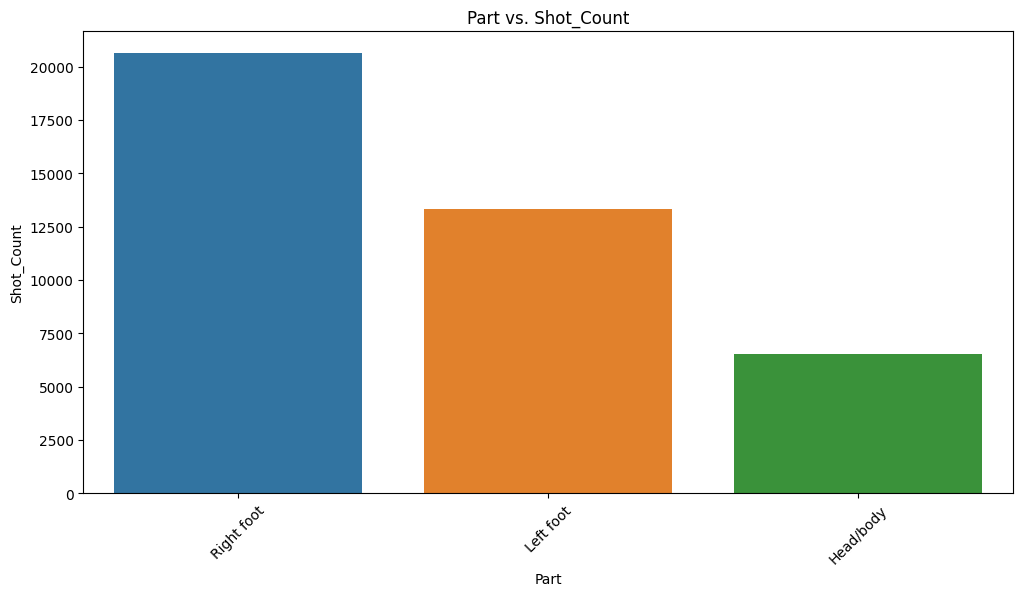

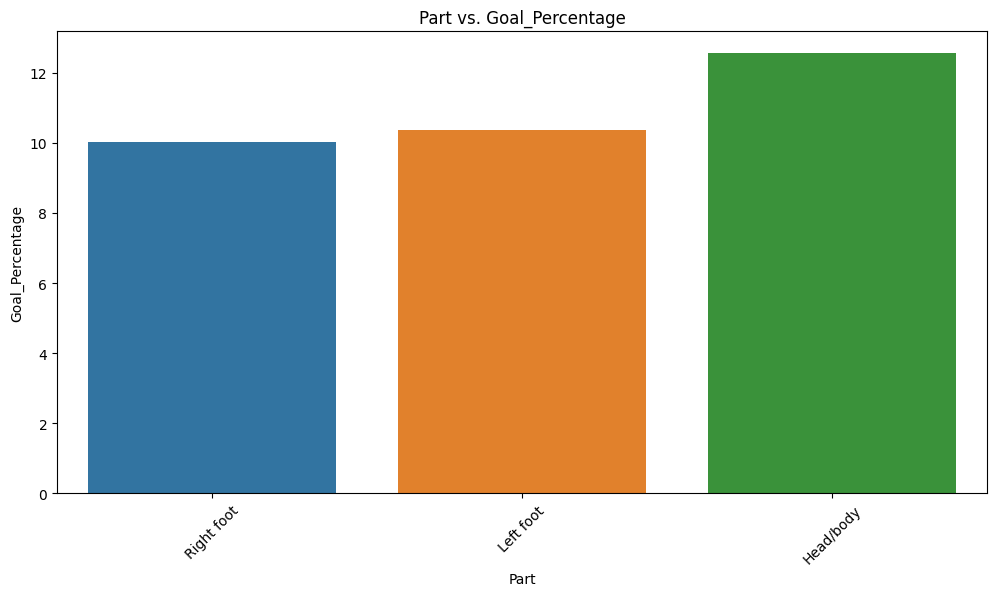

         Part  Shot_Count  Goal_Count  Goal_Percentage
0  Right foot       20619        2070        10.039284
1   Left foot       13322        1383        10.381324
2   Head/body        6517         818        12.551788


In [40]:
shot_part_counts = Shots_model['Part'].value_counts().reset_index()
shot_part_counts.columns = ['Part', 'Shot_Count']

goal_counts = Shots_model[Shots_model['is_Goal'] == 1]['Part'].value_counts().reset_index()
goal_counts.columns = ['Part', 'Goal_Count']

result = pd.merge(shot_part_counts, goal_counts, on='Part', how='left').fillna(0)


result['Goal_Percentage'] = (result['Goal_Count'] / result['Shot_Count']) * 100


plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='Part', y='Shot_Count')
plt.xlabel('Part')
plt.ylabel('Shot_Count')
plt.title('Part vs. Shot_Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='Part', y='Goal_Percentage')
plt.xlabel('Part')
plt.ylabel('Goal_Percentage')
plt.title('Part vs. Goal_Percentage')
plt.xticks(rotation=45)
plt.show()

print(result)



In [41]:
shot_part_counts = Shots_model['Shot_Part'].value_counts().reset_index()
shot_part_counts.columns = ['Shot_Part', 'Shot_Count']


goal_counts = Shots_model[Shots_model['is_Goal'] == 1]['Shot_Part'].value_counts().reset_index()
goal_counts.columns = ['Shot_Part', 'Goal_Count']

result = pd.merge(shot_part_counts, goal_counts, on='Shot_Part', how='left').fillna(0)

result['Goal_Percentage'] = (result['Goal_Count'] / result['Shot_Count']) * 100

print(result)


     Shot_Part  Shot_Count  Goal_Count  Goal_Percentage
0  Strong Foot       26212        2580         9.842820
1    Weak Foot        7729         873        11.295122
2    Head/body        6517         818        12.551788


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

## Age

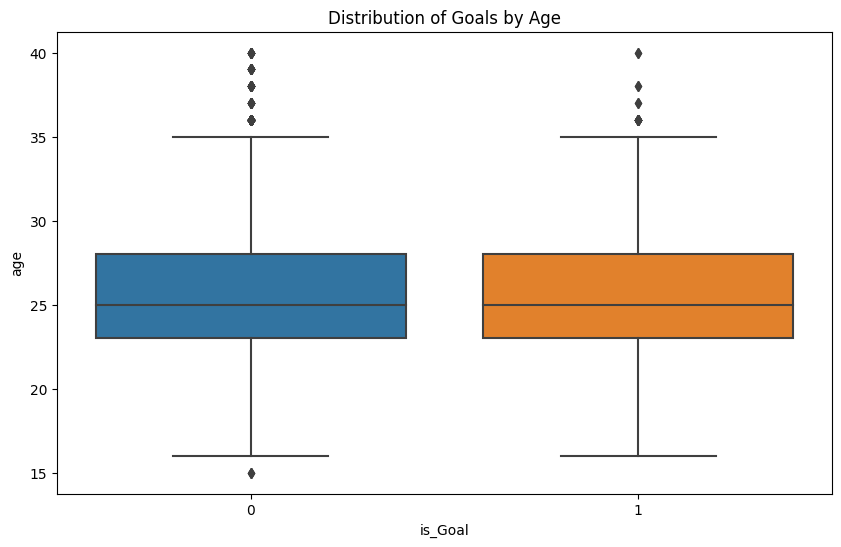

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='is_Goal', y='age', data=Shots_model)
plt.title('Distribution of Goals by Age')
plt.show()


In [44]:
age_goal_rate = Shots_model.groupby('age')['is_Goal'].mean().reset_index()

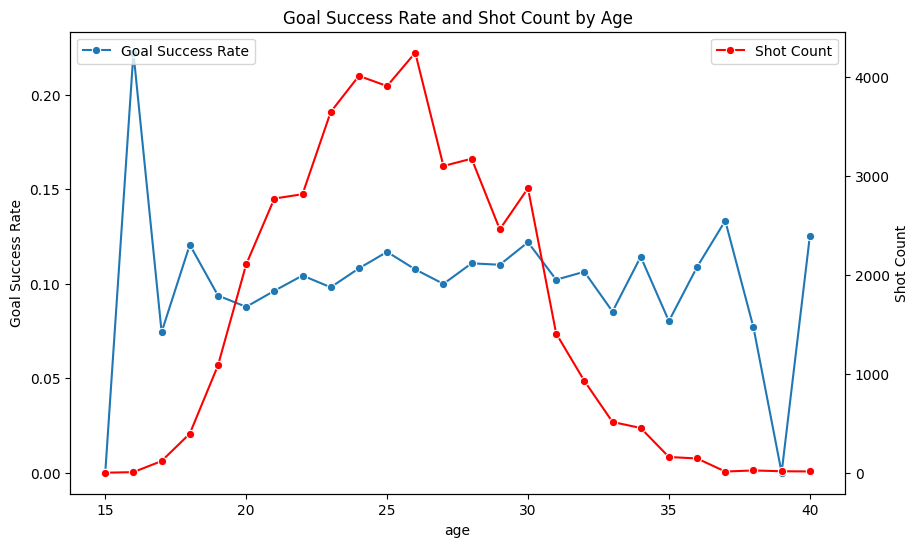

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(x='age', y='is_Goal', data=age_goal_rate, marker="o", ax=ax1, label='Goal Success Rate')
plt.title('Goal Success Rate and Shot Count by Age')
plt.ylabel('Goal Success Rate')
ax2 = ax1.twinx()
age_shot_count = Shots_df.groupby('age')['eventSec'].count().reset_index()
sns.lineplot(x='age', y='eventSec', data=age_shot_count, marker="o", ax=ax2, color='red', label='Shot Count')
ax2.set_ylabel('Shot Count')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [50]:
# 使用条件过滤，获取年龄为16的所有数据
age_16_data = Shots_df[Shots_df['age'] == 16]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 查看完整的表格内容
print(age_16_data)


       eventId subEventName                   tags  playerId  \
5497        10         Shot          402,2101,1802    450826   
5498        10         Shot      402,201,1201,1801    450826   
17236       10         Shot  101,402,201,1202,1801    481329   
17242       10         Shot  101,402,201,1201,1801    481329   
17504       10         Shot     1901,402,2101,1802    481329   
17511       10         Shot     1901,402,2101,1802    481329   
17516       10         Shot          401,1215,1802    481329   
17736       10         Shot      402,201,1210,1802    481329   
17739       10         Shot      403,201,1212,1802    481329   

                                        positions  matchId eventName  teamId  \
5497       [{'y': 45, 'x': 79}, {'y': 0, 'x': 0}]  2499962      Shot    1610   
5498       [{'y': 34, 'x': 84}, {'y': 0, 'x': 0}]  2499962      Shot    1610   
17236      [{'y': 69, 'x': 88}, {'y': 0, 'x': 0}]  2575992      Shot    3193   
17242      [{'y': 52, 'x': 91}, {'y': 0

In [51]:
# 使用 groupby() 方法按年龄分组，并使用 count() 方法计算射门数量
age_shot_count = Shots_df.groupby('age')['eventSec'].count().reset_index()

# 重命名列名为 'age' 和 'shot_count'
age_shot_count.columns = ['age', 'shot_count']

# 打印结果
print(age_shot_count)


     age  shot_count
0   15.0           3
1   16.0           9
2   17.0         121
3   18.0         398
4   19.0        1088
5   20.0        2108
6   21.0        2774
7   22.0        2818
8   23.0        3649
9   24.0        4014
10  25.0        3911
11  26.0        4248
12  27.0        3103
13  28.0        3177
14  29.0        2463
15  30.0        2878
16  31.0        1410
17  32.0         931
18  33.0         516
19  34.0         455
20  35.0         162
21  36.0         147
22  37.0          15
23  38.0          26
24  39.0          18
25  40.0          16


## Role

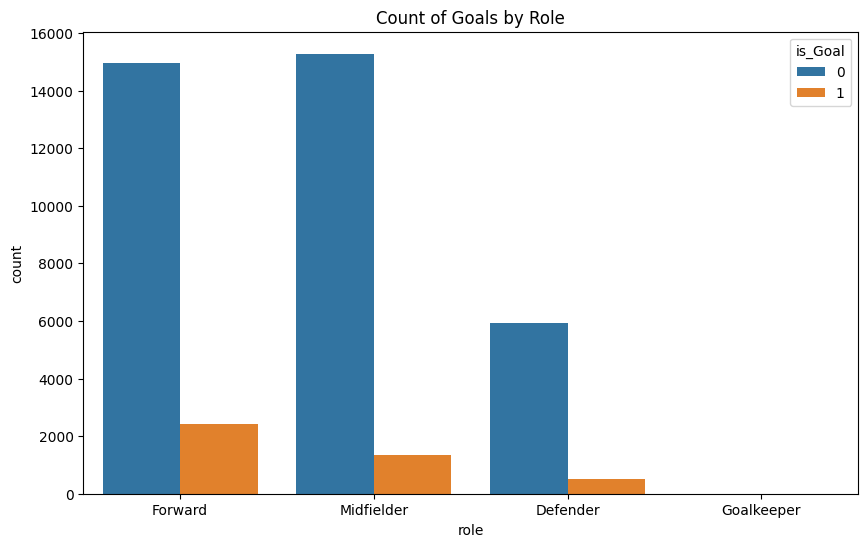

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='role', hue='is_Goal', data=Shots_model)
plt.title('Count of Goals by Role')
plt.show()


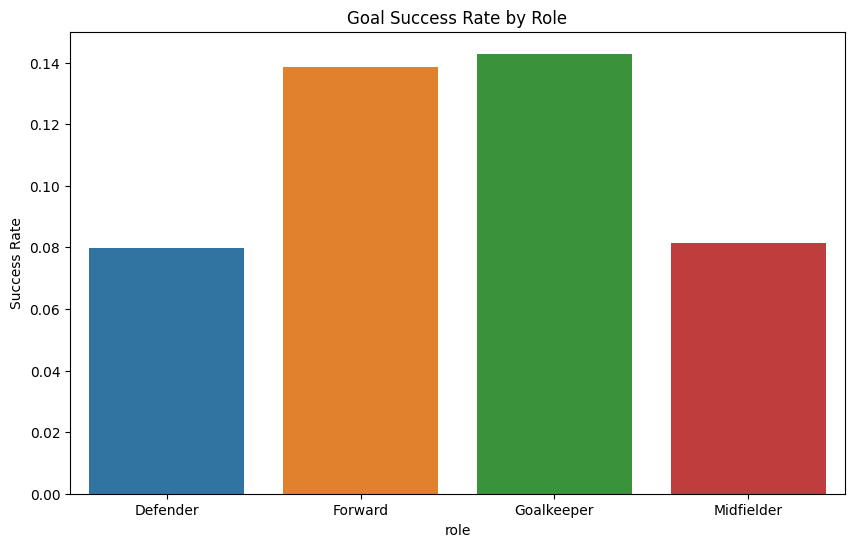

In [46]:
role_goal_rate = Shots_model.groupby('role')['is_Goal'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='role', y='is_Goal', data=role_goal_rate)
plt.title('Goal Success Rate by Role')
plt.ylabel('Success Rate')
plt.show()


In [47]:
role_shot_counts = Shots_model['role'].value_counts().reset_index()
role_shot_counts.columns = ['role', 'Shot_Count']
goal_counts_by_role = Shots_model[Shots_model['is_Goal'] == 1]['role'].value_counts().reset_index()
goal_counts_by_role.columns = ['role', 'Goal_Count']
result_by_role = pd.merge(role_shot_counts, goal_counts_by_role, on='role', how='left').fillna(0)
result_by_role['Goal_Percentage'] = (result_by_role['Goal_Count'] / result_by_role['Shot_Count']) * 100
print(result_by_role)


         role  Shot_Count  Goal_Count  Goal_Percentage
0     Forward       17370        2405        13.845711
1  Midfielder       16629        1351         8.124361
2    Defender        6452         514         7.966522
3  Goalkeeper           7           1        14.285714


In [48]:
Goalkeeper_data = Shots_df[Shots_df['role'] == 'Goalkeeper']
print(Goalkeeper_data)



       eventId subEventName                   tags  playerId  \
11910       10         Shot      402,201,1216,1802     20922   
13372       10         Shot      403,201,1210,1802      3719   
19782       10         Shot  101,403,201,1202,1801     21415   
25394       10         Shot      401,2101,201,1802     14914   
26595       10         Shot      403,201,1211,1802     16010   
31043       10         Shot      402,201,1213,1802     54579   
31481       10         Shot      402,201,1215,1802     19525   

                                        positions  matchId eventName  teamId  \
11910      [{'y': 54, 'x': 91}, {'y': 0, 'x': 0}]  2565710      Shot     674   
13372      [{'y': 44, 'x': 94}, {'y': 0, 'x': 0}]  2565782      Shot     683   
19782      [{'y': 49, 'x': 92}, {'y': 0, 'x': 0}]  2576099      Shot    3219   
25394  [{'y': 46, 'x': 91}, {'y': 100, 'x': 100}]  2516745      Shot    2481   
26595  [{'y': 49, 'x': 86}, {'y': 100, 'x': 100}]  2516796      Shot    2455   
31043  

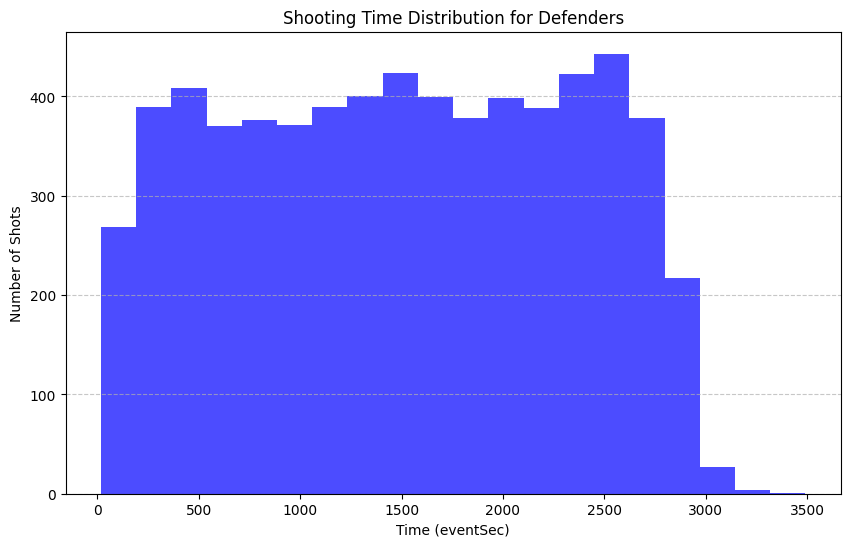

In [56]:
# 筛选出 "role" 为后卫的射门事件
defender_shots = Shots_model[Shots_model['role'] == 'Defender']

# 创建一个直方图来查看后卫的射门时间分布
plt.figure(figsize=(10, 6))
plt.hist(defender_shots['eventSec'], bins=20, color='blue', alpha=0.7)
plt.title('Shooting Time Distribution for Defenders')
plt.xlabel('Time (eventSec)')
plt.ylabel('Number of Shots')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Gameweek

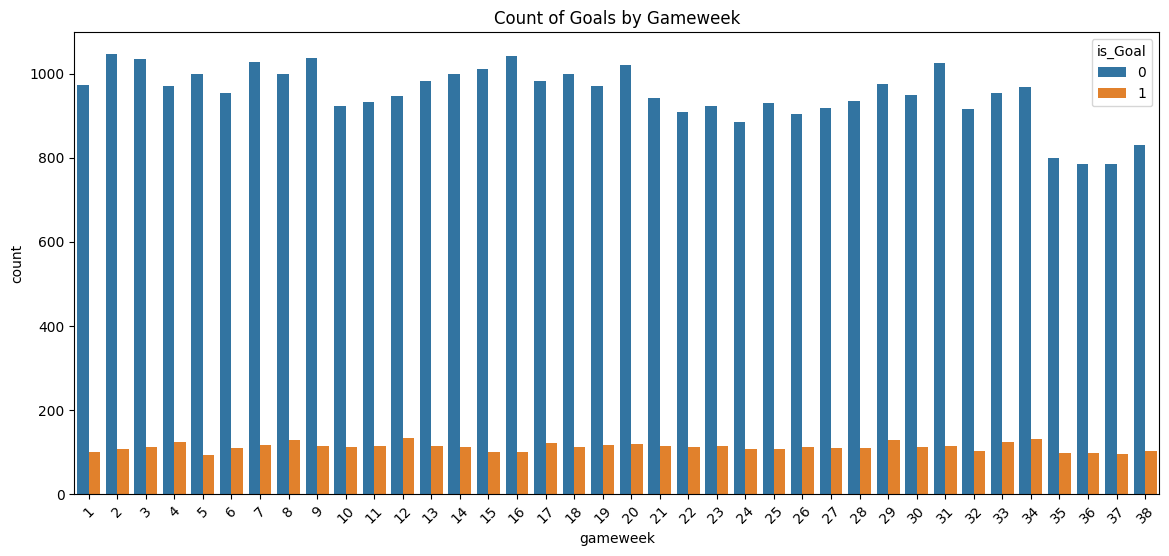

In [57]:
plt.figure(figsize=(14,6))
sns.countplot(x='gameweek', hue='is_Goal', data=Shots_model)
plt.title('Count of Goals by Gameweek')
plt.xticks(rotation=45)
plt.show()


## Side

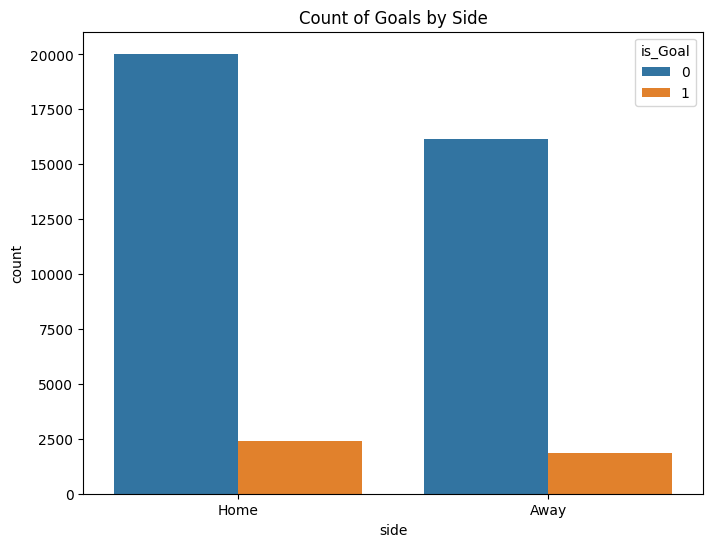

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x='side', hue='is_Goal', data=Shots_model)
plt.title('Count of Goals by Side')
plt.show()


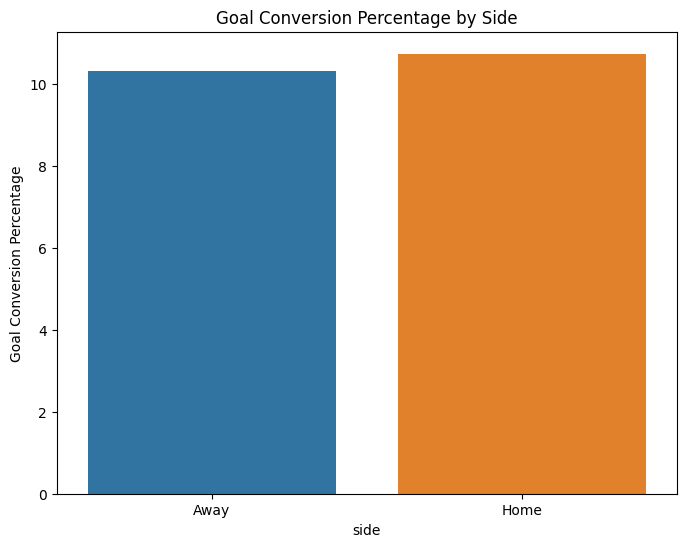

In [50]:
total_shots = Shots_model.groupby('side')['is_Goal'].count().reset_index()
successful_shots = Shots_model[Shots_model['is_Goal'] == 1].groupby('side')['is_Goal'].count().reset_index()
successful_shots['percentage'] = (successful_shots['is_Goal'] / total_shots['is_Goal']) * 100
plt.figure(figsize=(8,6))
sns.barplot(x='side', y='percentage', data=successful_shots)
plt.ylabel('Goal Conversion Percentage')
plt.title('Goal Conversion Percentage by Side')
plt.show()


In [51]:
side_shot_counts = Shots_model['side'].value_counts().reset_index()
side_shot_counts.columns = ['side', 'Shot_Count']
goal_counts_by_side = Shots_model[Shots_model['is_Goal'] == 1]['side'].value_counts().reset_index()
goal_counts_by_side.columns = ['side', 'Goal_Count']
result_by_side = pd.merge(side_shot_counts, goal_counts_by_side, on='side', how='left').fillna(0)
result_by_side['Goal_Percentage'] = (result_by_side['Goal_Count'] / result_by_side['Shot_Count']) * 100
print(result_by_side)


   side  Shot_Count  Goal_Count  Goal_Percentage
0  Home       22445        2412        10.746269
1  Away       18013        1859        10.320324


## Logistic

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [149]:
Shots_model1 = Shots_df[columns_to_keep].copy()
Shots_model1 = Shots_model1.drop(['Part', 'start_x', 'start_y'], axis=1)


In [150]:
Shots_model1.to_csv('Shots_model11.csv', index=False)


In [135]:
print(Shots_model1.columns)


Index(['matchPeriod', 'eventSec', 'distance', 'angle', 'is_Goal', 'Shot_Part',
       'age', 'role', 'gameweek', 'side', 'Y_position_centred', 'X_position'],
      dtype='object')


In [140]:
Shots_model1 = pd.get_dummies(Shots_model1, columns=['Shot_Part','matchPeriod','role','side'])

In [147]:
X = Shots_model1.drop('is_Goal', axis=1)  # 特征
y = Shots_model1['is_Goal']  # 标签

log_reg = LogisticRegression()
log_reg.fit(X, y)

# 打印模型的参数
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)


Coefficients: [[-3.16584282e-06 -1.26837770e-01  2.58473585e-02 -2.08133951e-02
   3.00518315e-03  7.62575782e-02 -1.32463393e-02 -1.68938323e-01
   1.37479752e-01  2.97845244e-02 -3.44924631e-02  3.28184160e-02
  -8.00955309e-02  7.56135123e-02 -1.30145619e-04  2.93811704e-03
   2.41666524e-03 -4.09071238e-03]]
Intercept: [-0.00167447]


In [145]:
import statsmodels.api as sm

# 添加常数项，因为 statsmodels 不会自动添加
X = sm.add_constant(Shots_model1.drop('is_Goal', axis=1))

# 构建模型
logit_model = sm.Logit(y, X)

# 拟合模型
result = logit_model.fit()

# 显示统计摘要
print(result.summary())


         Current function value: 0.284488
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                is_Goal   No. Observations:                40458
Model:                          Logit   Df Residuals:                    40442
Method:                           MLE   Df Model:                           15
Date:                Thu, 16 Nov 2023   Pseudo R-squ.:                  0.1562
Time:                        18:51:59   Log-Likelihood:                -11510.
converged:                      False   LL-Null:                       -13640.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.7043    4.4e+06   3.88e-07      1.000   -8.62e+06    8.62e+06
eventSec              -2.161e-05

/Users/huaweimacpro/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Model

In [52]:
print(list(Shots_model.columns))


['matchPeriod', 'eventSec', 'distance', 'angle', 'is_Goal', 'Shot_Part', 'age', 'role', 'gameweek', 'side', 'Y_position_centred', 'X_position', 'Part', 'start_x', 'start_y']


In [53]:
!pip install scikit-learn


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




In [156]:
Shots_model['age'].fillna(Shots_model['age'].mean(), inplace=True)
Shots_model['role'].fillna(Shots_model['role'].mode()[0], inplace=True)


In [76]:
Shots_model = Shots_model.drop(['Part', 'start_x', 'start_y'], axis=1)


print(Shots_model.isnull().sum())

matchPeriod           0
eventSec              0
distance              0
angle                 0
is_Goal               0
Shot_Part             0
age                   0
role                  0
gameweek              0
side                  0
Y_position_centred    0
X_position            0
dtype: int64


## Logistic Regression

In [56]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle']]  # 特征
y = Shots_model['is_Goal']  # 标签
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)

print("Logistic Regression Cross-validation accuracy scores:", cv_scores)
print("Logistic Regression Mean accuracy:", cv_scores.mean())

print("Logistic Regression Train log loss scores:", train_logloss_scores)
print("Logistic Regression Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("Logistic Regression Test log loss scores:", test_logloss_scores)
print("Logistic Regression Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


Logistic Regression Cross-validation accuracy scores: [0.8978003  0.89854177 0.89742956 0.89852923 0.89630454]
Logistic Regression Mean accuracy: 0.897721078442064
Logistic Regression Train log loss scores: [0.29254294566919803, 0.29211440367514846, 0.29264728947827445, 0.29193220124535413, 0.290838126508165]
Logistic Regression Mean Train log loss: 0.292014993315228
Logistic Regression Test log loss scores: [0.2900007206271338, 0.29170022461415845, 0.2895631829377788, 0.2924302608091946, 0.296878520689576]
Logistic Regression Mean Test log loss: 0.2921145819355683


In [70]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


categorical_features = [ 'Shot_Part', 'role']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle','Shot_Part', 'age', 'role']]  # 特征
y = Shots_model['is_Goal']  
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_final, y, cv=5, method='predict_proba')

train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)

print("Logistic Regression Cross-validation accuracy scores:", cv_scores)
print("Logistic Regression Mean accuracy:", cv_scores.mean())

print("Logistic Regression Train log loss scores:", train_logloss_scores)
print("Logistic Regression Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("Logistic Regression Test log loss scores:", test_logloss_scores)
print("Logistic Regression Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))



Logistic Regression Cross-validation accuracy scores: [0.8978003  0.89841819 0.90076619 0.90025955 0.89840564]
Logistic Regression Mean accuracy: 0.8991299719521388
Logistic Regression Train log loss scores: [0.285265925515202, 0.2848101573353299, 0.2851855731987522, 0.2844636488476473, 0.2835853371866839]
Logistic Regression Mean Train log loss: 0.28466212841672306
Logistic Regression Test log loss scores: [0.28246806409534764, 0.2842566898529455, 0.282719779072525, 0.28564913523334795, 0.2892050113451632]
Logistic Regression Mean Test log loss: 0.28485973591986585


In [72]:
Shots_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40458 entries, 0 to 40457
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   matchPeriod         40458 non-null  category
 1   eventSec            40458 non-null  float64 
 2   distance            40458 non-null  float64 
 3   angle               40458 non-null  float64 
 4   is_Goal             40458 non-null  int64   
 5   Shot_Part           40458 non-null  category
 6   age                 40458 non-null  float64 
 7   role                40458 non-null  category
 8   gameweek            40458 non-null  int64   
 9   side                40458 non-null  category
 10  Y_position_centred  40458 non-null  float64 
 11  X_position          40458 non-null  float64 
 12  Part                40458 non-null  category
 13  start_x             40458 non-null  int64   
 14  start_y             40458 non-null  int64   
dtypes: category(5), float64(6), int64(4)

In [81]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

categorical_features = ['matchPeriod', 'Shot_Part', 'role', 'side']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model.drop('is_Goal', axis=1)  # 特征
y = Shots_model['is_Goal']  # 标签
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_final, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)

print("Logistic Regression Cross-validation accuracy scores:", cv_scores)
print("Logistic Regression Mean accuracy:", cv_scores.mean())

print("Logistic Regression Train log loss scores:", train_logloss_scores)
print("Logistic Regression Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("Logistic Regression Test log loss scores:", test_logloss_scores)
print("Logistic Regression Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


Logistic Regression Cross-validation accuracy scores: [0.89792388 0.89792388 0.90014829 0.90075392 0.89877642]
Logistic Regression Mean accuracy: 0.8991052775665436
Logistic Regression Train log loss scores: [0.28524153684301745, 0.2846326841689489, 0.2850793565329838, 0.2845409290856012, 0.28342588565948806]
Logistic Regression Mean Train log loss: 0.28458407845800787
Logistic Regression Test log loss scores: [0.2834657762245702, 0.2843264132138228, 0.28238252760378124, 0.2854334925773356, 0.28917316862719933]
Logistic Regression Mean Test log loss: 0.2849562756493419


In [78]:
from sklearn.pipeline import Pipeline
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())


NameError: name 'pipeline' is not defined

In [60]:
!pip install xgboost
!pip install shap

In [61]:
!pip install numpy==1.21


## XGBoost

In [62]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

# 假设 Shots_model 是您的数据集

# 准备数据和标签
X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle']]  # 特征
y = Shots_model['is_Goal']  # 标签

# 创建XGBoost模型
model = XGBClassifier()

# 使用交叉验证评估XGBoost模型
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# 使用交叉验证预测概率
y_pred_probabilities = cross_val_predict(model, X, y, cv=5, method='predict_proba')

# 计算训练集和测试集的 log loss
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)

# 输出交叉验证的精确度和 log loss
print("XGBoost Cross-validation accuracy scores:", cv_scores)
print("XGBoost Mean accuracy:", cv_scores.mean())

print("XGBoost Train log loss scores:", train_logloss_scores)
print("XGBoost Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("XGBoost Test log loss scores:", test_logloss_scores)
print("XGBoost Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


XGBoost Cross-validation accuracy scores: [0.8954523  0.89705882 0.89742956 0.89815845 0.89618094]
XGBoost Mean accuracy: 0.8968560143200556
XGBoost Train log loss scores: [0.27715194916502794, 0.2761401753400591, 0.27659126296301845, 0.27656558823590727, 0.27631041877774803]
XGBoost Mean Train log loss: 0.2765518788963522
XGBoost Test log loss scores: [0.2933311773740318, 0.2987024125916087, 0.2952302740235532, 0.2970033601749796, 0.29881259293642076]
XGBoost Mean Test log loss: 0.29661596342011876


In [63]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss


categorical_features = [ 'Shot_Part', 'role']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle','Shot_Part', 'age', 'role']]  # 特征
y = Shots_model['is_Goal']  # 标签
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = XGBClassifier()
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_final, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)
print("XGBoost Cross-validation accuracy scores:", cv_scores)
print("XGBoost Mean accuracy:", cv_scores.mean())

print("XGBoost Train log loss scores:", train_logloss_scores)
print("XGBoost Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("XGBoost Test log loss scores:", test_logloss_scores)
print("XGBoost Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


XGBoost Cross-validation accuracy scores: [0.89730598 0.89569946 0.8971824  0.89902361 0.89729329]
XGBoost Mean accuracy: 0.8973009470315205
XGBoost Train log loss scores: [0.23913528861509814, 0.2416104701992876, 0.24324840584010224, 0.24125853706552144, 0.2422520036184069]
XGBoost Mean Train log loss: 0.24150094106768324
XGBoost Test log loss scores: [0.2902744271450807, 0.2942638380586288, 0.2915661825443518, 0.29365668863047567, 0.29351648862663926]
XGBoost Mean Test log loss: 0.29265552500103525


In [79]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

categorical_features = ['Shot_Part', 'role']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle','Shot_Part', 'age', 'role']]  
y = Shots_model['is_Goal']  
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = XGBClassifier()
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss')
grid_search.fit(X_final, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Log Loss:", -grid_search.best_score_)


KeyboardInterrupt: 

In [ ]:
categorical_features = ['matchPeriod', 'Shot_Part', 'role', 'side']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model.drop('is_Goal', axis=1) 
y = Shots_model['is_Goal'] 
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = XGBClassifier()
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)

print("XGBoost Cross-validation accuracy scores:", cv_scores)
print("XGBoost Mean accuracy:", cv_scores.mean())

print("XGBoost Train log loss scores:", train_logloss_scores)
print("XGBoost Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("XGBoost Test log loss scores:", test_logloss_scores)
print("XGBoost Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

# 假设 Shots_model 是您的数据集

# 将 object 类型的特征转换为 category
categorical_features = ['matchPeriod', 'Shot_Part', 'role', 'side']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')

# 准备数据和标签
X = Shots_model.drop('is_Goal', axis=1)  # 特征
y = Shots_model['is_Goal']  # 标签

# 对分类特征进行独热编码
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])

# 获取编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# 将编码后的特征名称添加到 X_encoded 的 DataFrame 中
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# 合并编码后的特征和其他特征
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)

# 创建XGBoost模型
model = XGBClassifier()

# 定义超参数搜索空间
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 使用网格搜索交叉验证评估XGBoost模型
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss')
grid_search.fit(X_final, y)

# 输出最佳参数和最佳交叉验证分数
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Log Loss:", -grid_search.best_score_)



In [82]:

categorical_features = ['matchPeriod', 'Shot_Part', 'role', 'side']
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
print(X)
print(X_encoded)
print(X_final)

      matchPeriod     eventSec   distance       angle    Shot_Part   age  \
0              1H    94.595788  14.007655   33.383357  Strong Foot  26.0   
1              1H   179.854785  15.808608   38.911535  Strong Foot  26.0   
2              1H   254.745027   4.414703  101.767186    Head/body  31.0   
3              1H   425.824035  23.057235   18.228723    Weak Foot  23.0   
4              1H   815.462015  29.563872   15.119733  Strong Foot  23.0   
...           ...          ...        ...         ...          ...   ...   
40453          2H  2369.402969  21.275923   11.058511  Strong Foot  17.0   
40454          2H  2411.702771  11.550000   52.145452  Strong Foot  24.0   
40455          2H  2506.631437  11.258637   36.064839    Weak Foot  31.0   
40456          2H  2508.341627   5.250000   94.218179  Strong Foot  21.0   
40457          2H  2821.203869  17.040026   20.975259    Weak Foot  18.0   

             role  gameweek  side  Y_position_centred  X_position  
0         Forward  

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


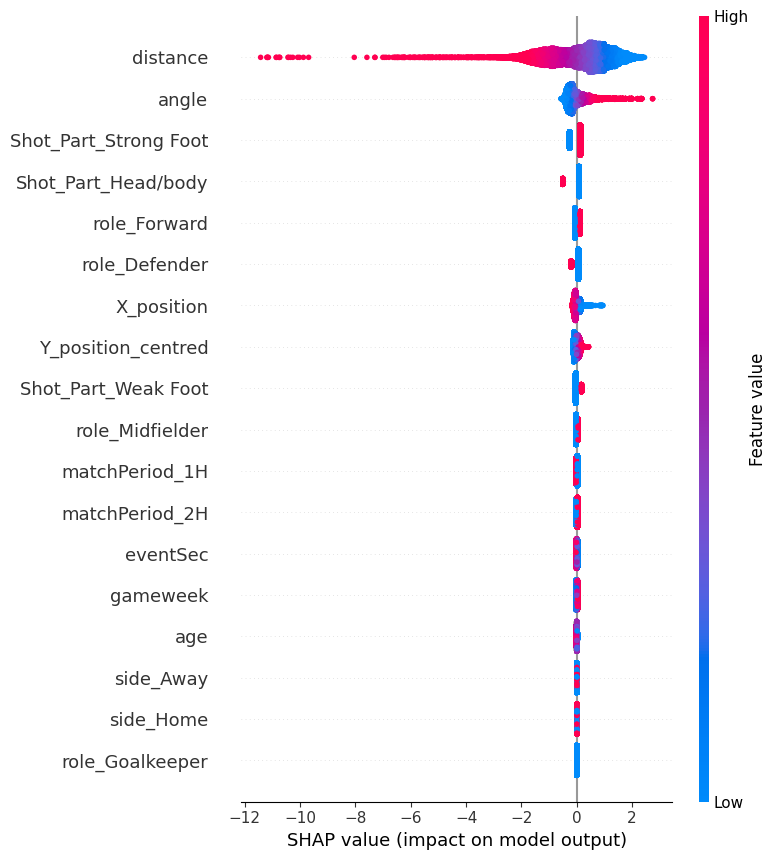

In [86]:
dtrain = xgboost.DMatrix(X_final, label=y)
params = {"objective": "binary:logistic"}
model = xgboost.train(params, dtrain)
explainer = shap.Explainer(model, feature_names=X_final.columns)
shap_values = explainer.shap_values(X_final)
shap.summary_plot(shap_values, X_final)

NameError: name 'xgboost' is not defined

In [85]:
import xgboost as xgb

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 创建XGBoost模型
model = xgb.XGBClassifier()
model.fit(X_final, y)

# 获取特征重要性分数
feature_importance = model.feature_importances_

# 获取特征名称
feature_names = X_final.columns

# 将特征名称和重要性分数组合在一起，以便排序
feature_importance_data = list(zip(feature_names, feature_importance))

# 按照重要性分数降序排序
feature_importance_data.sort(key=lambda x: x[1], reverse=True)

# 提取排序后的特征名称和重要性分数
sorted_feature_names = [x[0] for x in feature_importance_data]
sorted_feature_importance = [x[1] for x in feature_importance_data]

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Simplified Feature Importance')
plt.show()


## Support Vector Machine

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import log_loss

X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle']] 
y = Shots_model['is_Goal'] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = SVC(probability=True)  
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)
print("SVM Cross-validation accuracy scores:", cv_scores)
print("SVM Mean accuracy:", cv_scores.mean())

print("SVM Train log loss scores:", train_logloss_scores)
print("SVM Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("SVM Test log loss scores:", test_logloss_scores)
print("SVM Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


In [ ]:
categorical_features = ['Shot_Part', 'role']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle', 'Shot_Part', 'age', 'role']] 
y = Shots_model['is_Goal']
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = SVC(probability=True)
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_final, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)

print("SVM Cross-validation accuracy scores:", cv_scores)
print("SVM Mean accuracy:", cv_scores.mean())

print("SVM Train log loss scores:", train_logloss_scores)
print("SVM Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("SVM Test log loss scores:", test_logloss_scores)
print("SVM Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


In [ ]:
categorical_features = ['matchPeriod', 'Shot_Part', 'role', 'side']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model.drop('is_Goal', axis=1)
y = Shots_model['is_Goal']
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = SVC(probability=True)
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)
print("SVM Cross-validation accuracy scores:", cv_scores)
print("SVM Mean accuracy:", cv_scores.mean())

print("SVM Train log loss scores:", train_logloss_scores)
print("SVM Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("SVM Test log loss scores:", test_logloss_scores)
print("SVM Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


## Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle']] 
y = Shots_model['is_Goal']  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_scaled, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)
print("Random Forest Cross-validation accuracy scores:", cv_scores)
print("Random Forest Mean accuracy:", cv_scores.mean())

print("Random Forest Train log loss scores:", train_logloss_scores)
print("Random Forest Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("Random Forest Test log loss scores:", test_logloss_scores)
print("Random Forest Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


In [ ]:
categorical_features = ['Shot_Part', 'role']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model[['Y_position_centred', 'X_position', 'distance', 'angle', 'Shot_Part', 'age', 'role']]
y = Shots_model['is_Goal']
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, random_state=42)
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_final, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)
print("Random Forest Cross-validation accuracy scores:", cv_scores)
print("Random Forest Mean accuracy:", cv_scores.mean())

print("Random Forest Train log loss scores:", train_logloss_scores)
print("Random Forest Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("Random Forest Test log loss scores:", test_logloss_scores)
print("Random Forest Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


In [ ]:
categorical_features = ['matchPeriod', 'Shot_Part', 'role', 'side']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model.drop('is_Goal', axis=1) 
y = Shots_model['is_Goal'] 
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = RandomForestClassifier(n_estimators=100) 
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_final, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)
print("Random Forest Cross-validation accuracy scores:", cv_scores)
print("Random Forest Mean accuracy:", cv_scores.mean())

print("Random Forest Train log loss scores:", train_logloss_scores)
print("Random Forest Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("Random Forest Test log loss scores:", test_logloss_scores)
print("Random Forest Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


In [ ]:
categorical_features = ['matchPeriod', 'Shot_Part', 'role', 'side']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')
X = Shots_model.drop('is_Goal', axis=1) 
y = Shots_model['is_Goal'] 
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)
model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, random_state=42)
cv_scores = cross_val_score(model, X_final, y, cv=5, scoring='accuracy')
y_pred_probabilities = cross_val_predict(model, X_final, y, cv=5, method='predict_proba')
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)
print("Random Forest Cross-validation accuracy scores:", cv_scores)
print("Random Forest Mean accuracy:", cv_scores.mean())

print("Random Forest Train log loss scores:", train_logloss_scores)
print("Random Forest Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("Random Forest Test log loss scores:", test_logloss_scores)
print("Random Forest Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

categorical_features = ['matchPeriod', 'Shot_Part', 'role', 'side']
Shots_model[categorical_features] = Shots_model[categorical_features].astype('category')

# 准备数据和标签
X = Shots_model.drop('is_Goal', axis=1)  # 特征
y = Shots_model['is_Goal']  # 标签

# 对分类特征进行独热编码
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])

# 获取编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# 将编码后的特征名称添加到 X_encoded 的 DataFrame 中
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# 合并编码后的特征和其他特征
X_final = pd.concat([X.drop(columns=categorical_features), X_encoded_df], axis=1)

# 使用交叉验证评估神经网络模型
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  # 可以根据需要调整隐藏层大小和迭代次数

# 使用交叉验证预测概率
y_pred_probabilities = cross_val_predict(model, X_final, y, cv=5, method='predict_proba')

# 计算训练集和测试集的 log loss
train_logloss_scores = []
test_logloss_scores = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_final, y):
    X_train, X_test = X_final.iloc[train_idx], X_final.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_train_pred_prob = model.predict_proba(X_train)
    y_test_pred_prob = model.predict_proba(X_test)
    
    train_logloss = log_loss(y_train, y_train_pred_prob)
    test_logloss = log_loss(y_test, y_test_pred_prob)
    
    train_logloss_scores.append(train_logloss)
    test_logloss_scores.append(test_logloss)
print("Neural Network Cross-validation accuracy scores:", cv_scores)
print("Neural Network Mean accuracy:", cv_scores.mean())

print("Neural Network Train log loss scores:", train_logloss_scores)
print("Neural Network Mean Train log loss:", sum(train_logloss_scores) / len(train_logloss_scores))

print("Neural Network Test log loss scores:", test_logloss_scores)
print("Neural Network Mean Test log loss:", sum(test_logloss_scores) / len(test_logloss_scores))
